# Validation Methods

In [25]:
require(ISLR)
require(boot)

In [26]:
?cv.glm

cv.glm                  package:boot                   R Documentation

_C_r_o_s_s-_v_a_l_i_d_a_t_i_o_n _f_o_r _G_e_n_e_r_a_l_i_z_e_d _L_i_n_e_a_r _M_o_d_e_l_s

_D_e_s_c_r_i_p_t_i_o_n:

     This function calculates the estimated K-fold cross-validation
     prediction error for generalized linear models.

_U_s_a_g_e:

     cv.glm(data, glmfit, cost, K)
     
_A_r_g_u_m_e_n_t_s:

    data: A matrix or data frame containing the data.  The rows should
          be cases and the columns correspond to variables, one of
          which is the response.

  glmfit: An object of class '"glm"' containing the results of a
          generalized linear model fitted to 'data'.

    cost: A function of two vector arguments specifying the cost
          function for the cross-validation.  The first argument to
          'cost' should correspond to the observed responses and the
          second argument should correspond to the predict

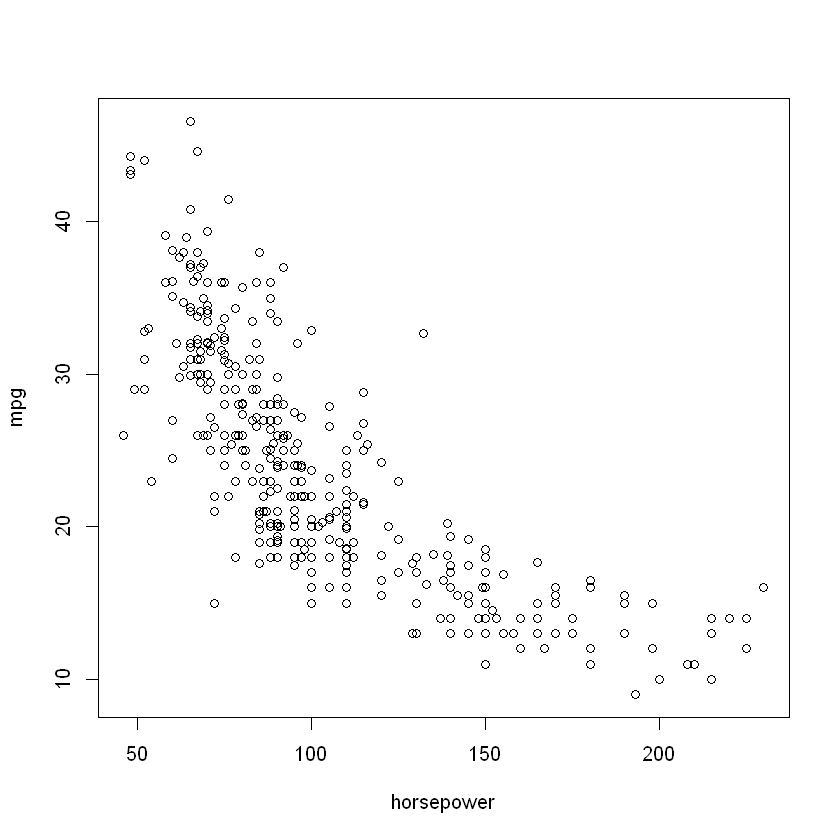

In [27]:
# Plot miles per gallon and horsepower.
plot(mpg~horsepower, data = Auto)

## Leave one out cross-validation (LOOCV)

In [28]:
# glpm can fit linear models or nonlinear models as well such as logistic regression.
glm.fit <- glm(mpg ~ horsepower, data = Auto)
# LOOCV - fits the model repeatedly n times for n observations.
# Each time, it leaves out one observation, produces a fit on all the other data
# and then makes a prediction at the x value for that observation you left out.
# Slow, because it does it by brute force; refits the model all those times.
# It produced a bunch of data but here we're just looking at the delta.
# The reason cv.glm doesn't use the shortcut formula from 5.2 is that it's
# also set up to work on logistic regressions and other
# models, and there the shortcut doesn't work.
cv.glm(Auto, glm.fit)$delta
# First result is the raw LOOCV result, second is the bias-corrected version of it.

[1] 24.23151 24.23114

In [29]:
# Formula for 5.2
loocv <- function(fit) {
    # Uses post processor for lm fit
    h <- lm.influence(fit)$h
    # residuals and 1 - h are vectors.
    mean((residuals(fit) / (1 - h))^2)
    # Since this was last quantity computed, it's what the function returns.
}

# Very quickly it computed the 24.23 that we saw above for the results of cv.glm.
loocv(glm.fit)

[1] 24.23151

In [30]:
# Create a vector for collecting errors.
cv.error <- rep(0, 5)
degree <- 1:5
for (d in degree) {
    # Fit the glm using the polynomial of that degree.
    glm.fit <- glm(mpg ~ poly(horsepower, d), data = Auto)
    # Use our function to compute the error.
    cv.error[d] <- loocv(glm.fit)
}

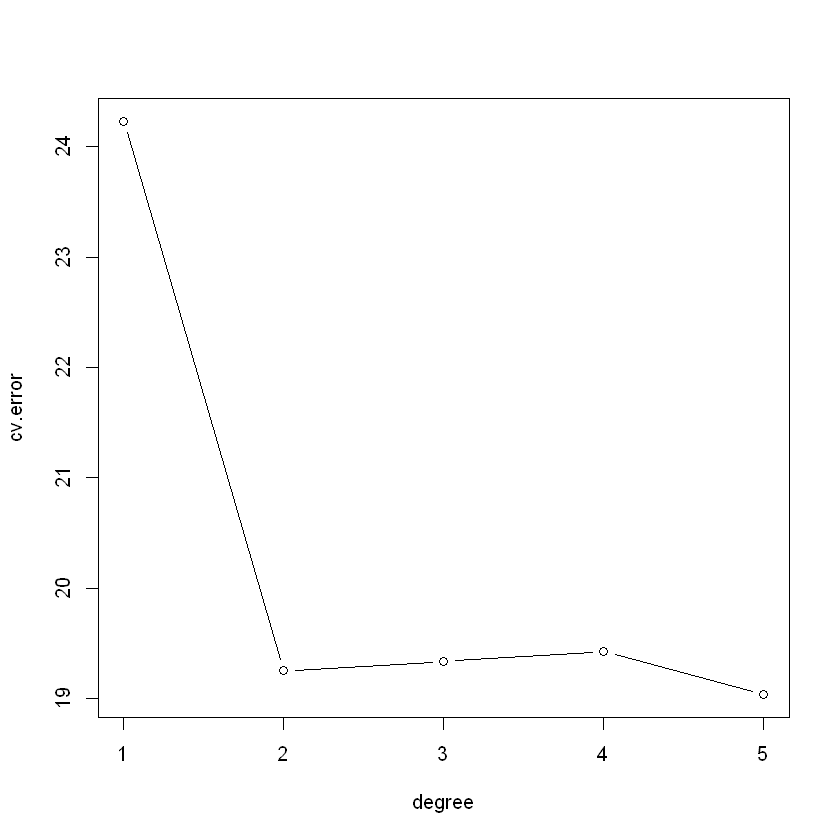

In [31]:
plot(degree, cv.error, type = "b")

## 10-fold cross-validation
Divide the data up into 10 pieces. Each 1/10 is a test set
and the 9/10 acts as a training set. Only have to fit the model 10 times.
With LOOCV you have to fit the model n times where n is the number of training points.

In [33]:
# Create a vector for collecting errors.
cv.error10 <- rep(0, 5)
for (d in degree) {
    # Fit the glm using the polynomial of that degree.
    glm.fit <- glm(mpg ~ poly(horsepower, d), data = Auto)
    # Use our function to compute the error.
    cv.error10[d] <- cv.glm(Auto, glm.fit, K = 10)$delta[1]
}
# Pretty quick because it's only fitting the model 10 times each time.

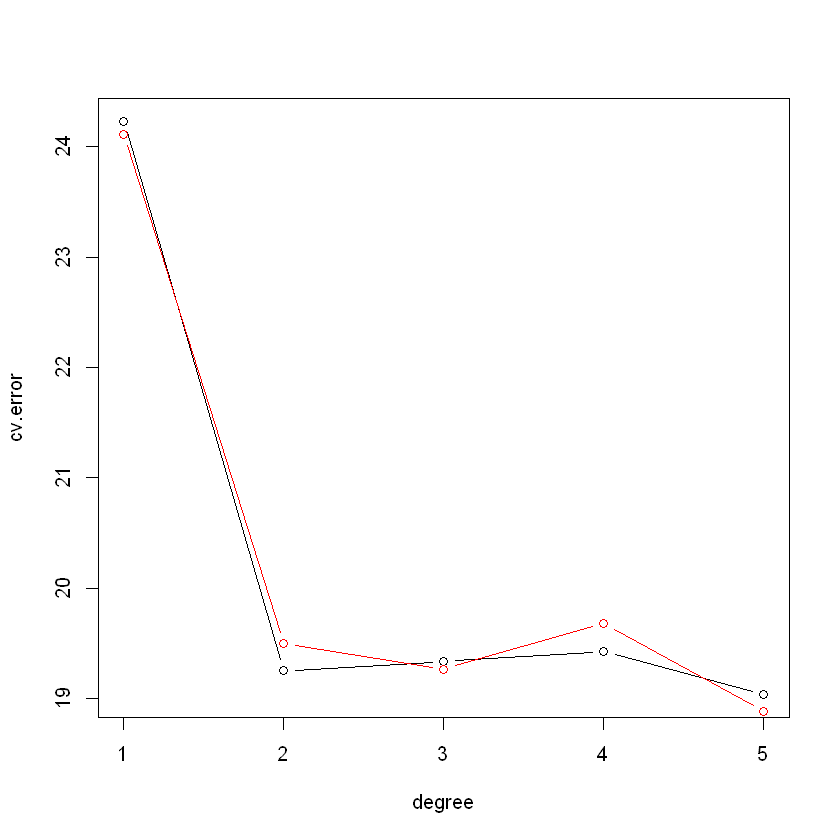

In [38]:
plot(degree, cv.error, type = "b")
lines(degree, cv.error10, type = "b", col = "red")
# In this case 10-fold and LOOCV are not much different.
# In general, we favor 10-fold cross-validation for computing errors. It tends
# to be a more stable measure than LOOCV and most of the time is cheaper to compute.